# Метод K-ближайших соседей
KNN(k-nearest neighbors) - один из простейших алгоритмов машинного обучения. Для каждой точки этот алгоритм присваивает значение, основываясь на **расстоянии** между старыми данными и новыми данными.

## Рассмотрим на примере задачи определения пола для цыплят

Предположим, что у нас есть набор данных с ростом и весом цыплят. Можно ли написать алгоритм, определяющий пол цыплёнка на основе его роста и веса?

Данные выглядят следующим образом:

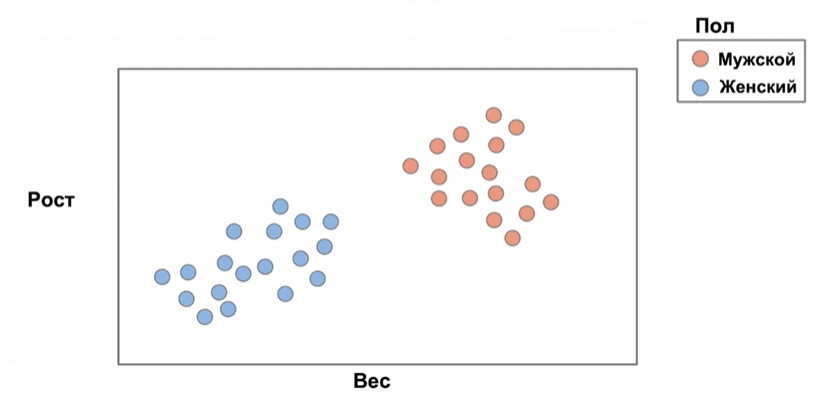

После этого к нам поступают данные о каком-то новом цыплёнке, для которого измерены рост и вес:

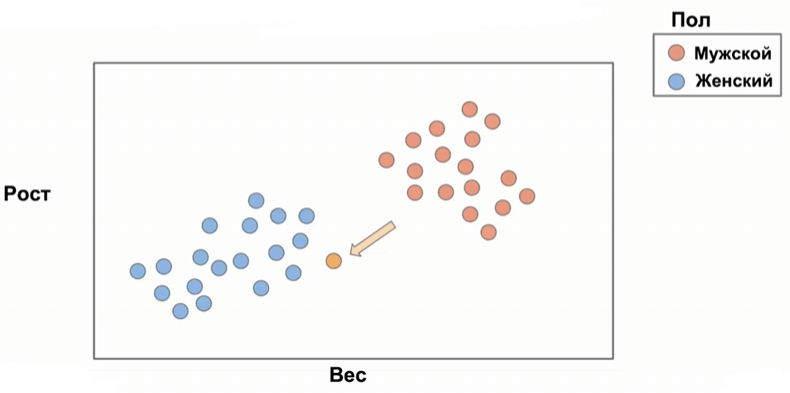

Как определить пол этого нового цыплёнка?

Интуитивно, можно сказать, что с большой вероятностью пол этого цыплёнка - женский, так как он находится рядом с синими точками:

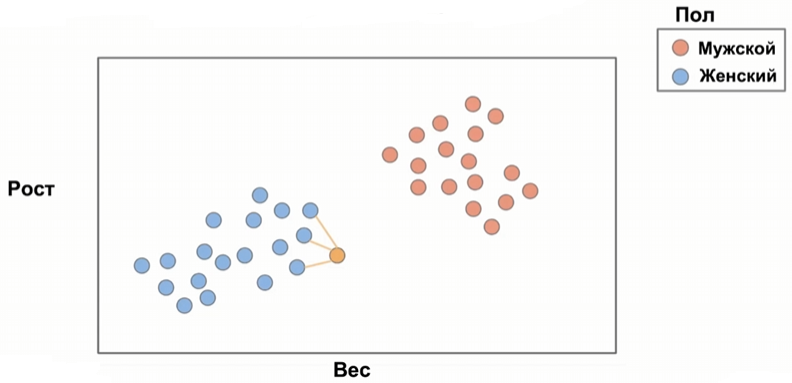

Но что делать, когда случай менее очевидный:

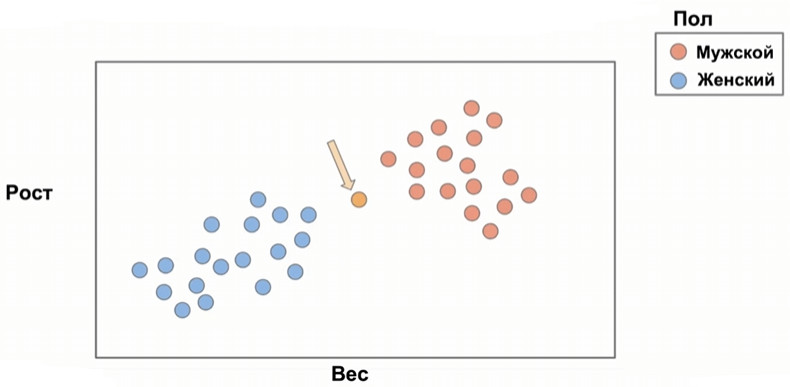

Здесь, точка с данными о новом цыплёнке находится примерно по середине между двумя кластерами точек. Тут также появляется ещё один вопрос - **сколько ближайших точек необходимо рассматривать?**

## Число *k*

В первом случае, мы нарисовали линии от новой точки, до ближайших трёх точек. Но как выбрать количество таких линий, если точка находится где-то по середине между двумя кластерами точек? 

**Почему этот вопрос является настолько важным? Представим себе следующую ситуацию:**

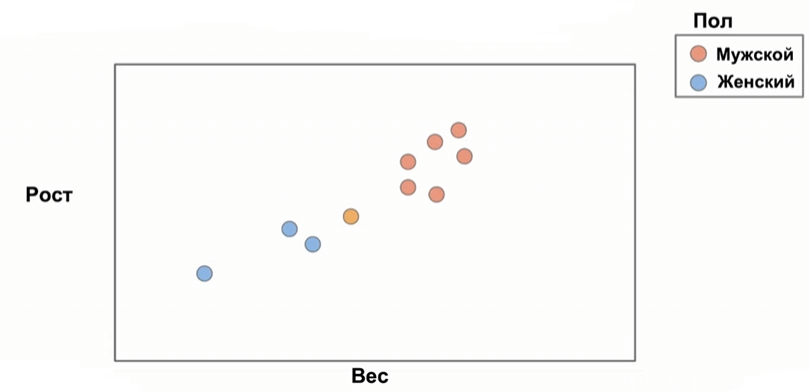

Здесь для некоторой новой точки мы хотим определить пол цыплёнка. Если мы выберем *k=1*, то есть рассматриваем только одну ближайшую точку, то это будет самый простейший вариант метода KNN:

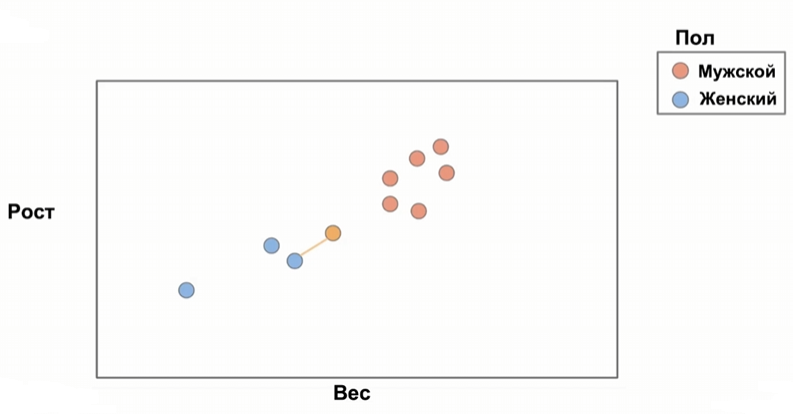

Мы берем новую точку, далее находим самую близкую к ней уже известную точку и таким образом определяем класс для новой точки В итоге, мы говорим, что для новой точки пол - женский.

Если выбрать *k=2*, то в этом случае мы снова говорим, что пол женский:

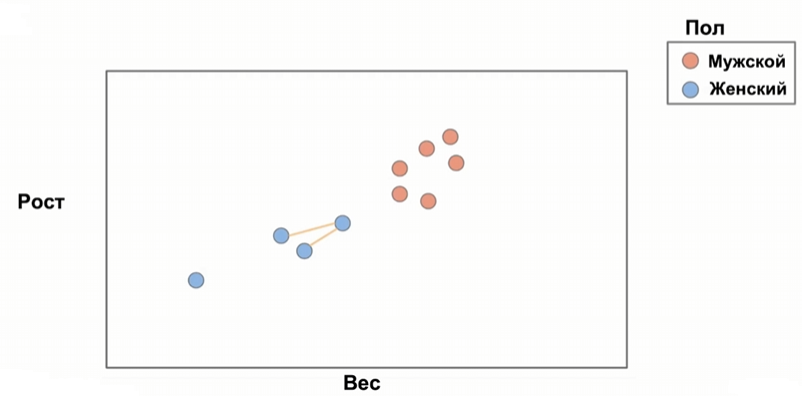

После этого, выберем *k=3*, здесь уже начинаем захватывать одну точку с мужским полом, т.е. **из трёх ближайших точек - две женских и одна мужская:**

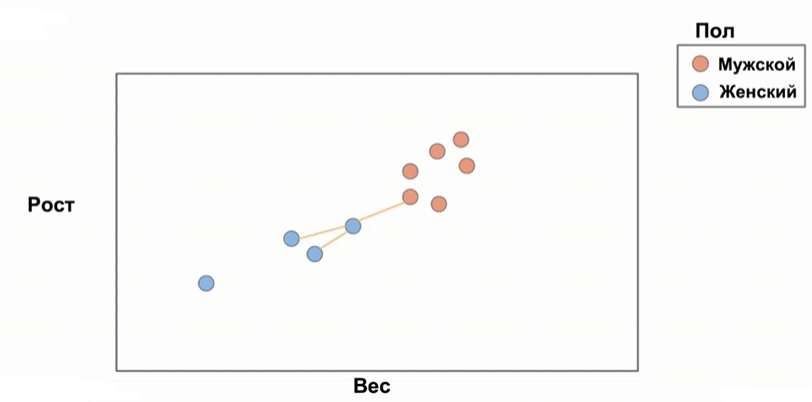

В таком случае, метод K-ближайших соседей делает следующее: мы говорим о том, что нужно выбрать класс с наибольшим количеством точек - это чем-то напоминает голосование, **у нас получается два голоса за женский пол и один за мужской - поэтому мы выбираем женский пол**.

### Равное количество голосов(tie)

Что будет если мы выберем *k=4*? В таком случае мы получаем **четыре ближайшие точки - две из которых мужские, а две других - женские**:

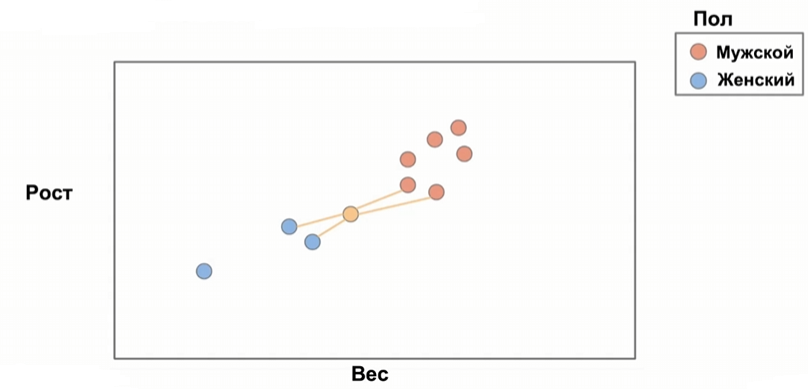

В таких случаях есть несколько вариантов того, как сделать выбор:
* Всегда выбирать нечётные значения *k* - тогда такая проблема не возникнет
* В случае равенства при чётном *k*, уменьшить *k* на 1
* Случайно выбрать тот или иной вариант класса
* Взять только самую ближайшую точку - по сути сделать то же действие, что и *k=1*

В Scikit-Learn, если для алгоритмов KNN выяснится, что две соседние точки, сосед *k+1* и сосед *k*, имеют одинаковые расстояния, но разные классы, то результат будет зависеть от сортировки обучающих данных. В случае равенства(ties) будет выбран класс, идущий первым в множестве соседей. Результаты в Scikit-Learn сортируются по расстоянию, поэтому, в итоге, будет выбрана точка с ближайшим расстоянием - по сути это последний вариант из приведённого выше списка.

В нашем примере, когда *k=4*, мы **возьмём самую ближайшую точку**:

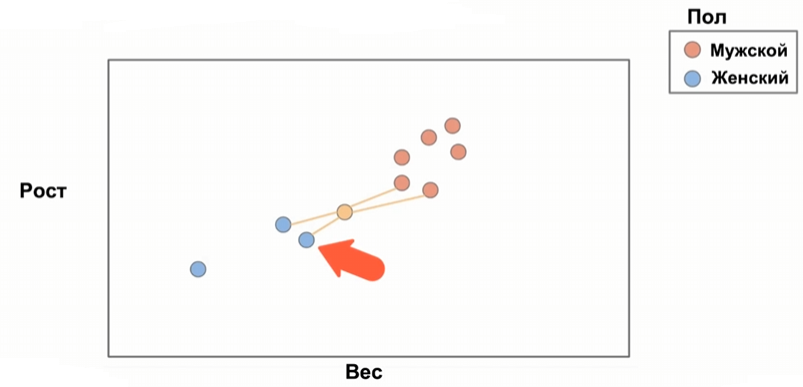

Если же мы увеличим *k=5*, то алгоритм возвратит другое значение, потому что теперь **три ближайшие точки - мужские, а женских всего две.**

## Как выбрать число *k*?

Приведет ли увеличение *k* к более точным результатам? Как выбрать оптимальное значение *k*?

В качестве критерия для выбора *k*, можно сказать, что нам хотелось бы минимизировать ошибку. Которая будет равна:$$error = 1-accuracy$$ То есть если наш алгоритм имеет 90% accuracy, то ошибка будет равна 10%.

Для минимизации ошибки можно использовать два метода:
1. Метод локтя - более ручной метод
2. Кросс-валидация - перебор различных значений *k* по сетке(grid search), чтобы найти значение *k* с наименьшими ошибками.

### Метод локтя(elbow method)

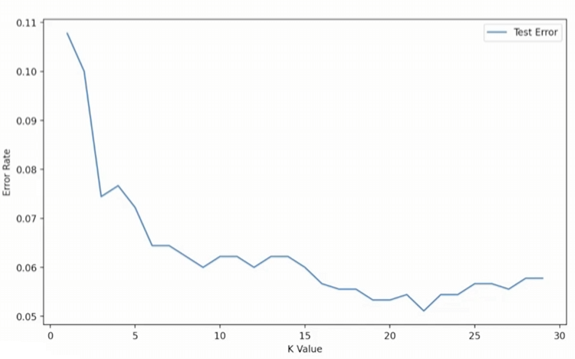

В этом методе мы обучаем модель для различных значений *k* на одном и том же обучающем наборе данных. Далее для каждого *k*, проверяется работа модели на одном и том же тестовом наборе данных, после чего все результаты наносятся на график(по горизонтали - значения *k*, по вертикали - ошибка на тестовом наборе данных).

В большинстве случаев, но не во всех(так как всё зависит от конкретных данных), при увеличении *k* из обучающих данных извлекается больше сигнала. В итоге можно наблюдать заметное уменьшение ошибки с ростом числа *k*. 

Однако, во многих случаях, будет некоторая точка - точка локтя, начиная с которой график будет переходить от достаточно резкого падения к более пологой кривой. На графике эта точка примерно *k=10*:

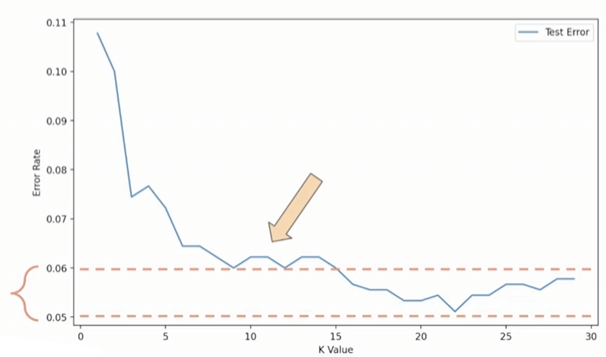

После такой точки говорится об уменьшении ошибки лишь на 1%. В этот момент можно принять решение о том, что дальнейшее уменьшение *k* уже не имеет смысла, так как более высокие значения *k* делают модель более трудоёмкой. 

На графике точка *k=25* имеет меньшую ошибку, чем *k=10*, однако ошибка уменьшится лишь немного, а вот модель существенно усложнится.

### Кросс-валидация

Чтобы исключить влияние человеческого фактора в этом методе, можно перейти к методу кросс-валидации.

Кросс-валидация ищет значение *k*, ориентируясь только на минимизацию ошибок, однако - это может привести к более сложной модели(более высокому значению *k*). **Ваэно учитывать специфику задачи, чтобы понять, насколько приемлемо увеличение значения *k*.**

## Итоги

Алгоритм K-ближайших соседей выглядит следующим образом:
* Выбираем значение *k* - сколько ближайших соседей будет рассматриваться для каждой новой точки
* Сортируем вектора признаков(в N-мерном пространстве признаков, где N - это количество признаков) по метрике расстояния
* Выбираем класс точек на основе K ближайших векторов признаков

Такой алгоритм является достаточно трудоёмким, потому что мы выполняем сортировку векторов для каждой новой точки, так что трудоёмкость зависит от общего количества точек.

Метрика расстояния между точками может быть разной:
* Расстояние Минковского
* Евклидова метрика
* Расстояние городских кварталов(Manhattan)
* Расстояние Чебышёва

Также для метода K-ближайших соседей надо иметь в виду, что признаки могут иметь совершенно разную шкалу единиц измерения. Например, для двух признаков Feature1 и Feature2:

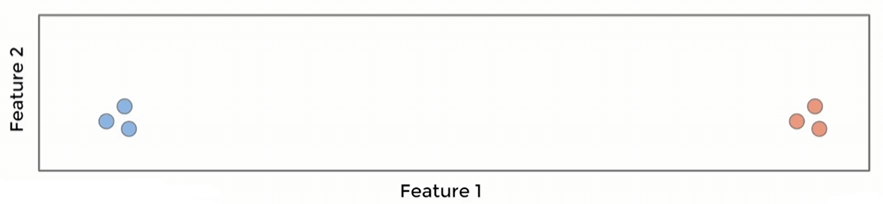

Для второго признака мы имеем более широкий масштаб значений, поэтому точки находятся далеко друг от друга:

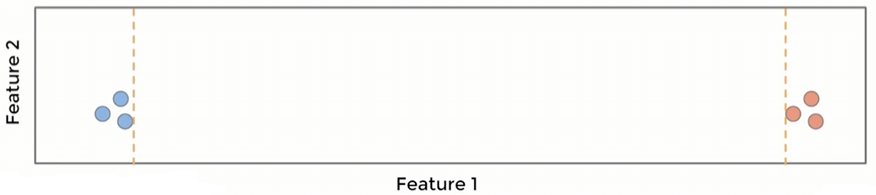

Для первого признака, масштаб значений сильно ниже, поэтому точки выглядят очень близкими друг к другу:

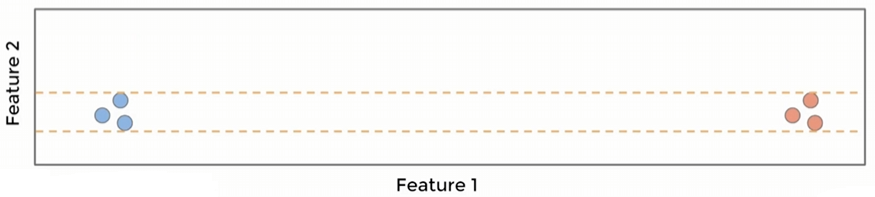

Если посмотреть на метрики расстояния между точками, то эти метрики зависят от масштаба отдельных признаков. Поэтому, **чтобы у разных признаков были равные шансы поучаствовать в определении расстояния, для метода K-ближайших соседей нужно выполнять масштабирование признаков - это условие является ОБЯЗАТЕЛЬНЫМ(!!!) для хорошей работы этого метода**:

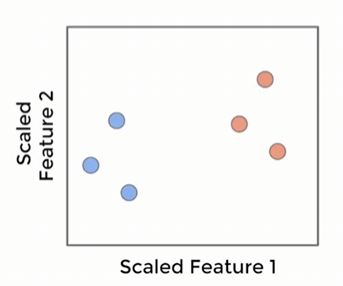

Хотя алгоритм KNN и является очень простым, важно учитывть необходимость:
* Выбирать значение *k*
* Масштабировать признаки